In [9]:

import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import multivariate_normal

In [10]:
x1=2*np.random.randn(1200,1)+2
x2=.75*np.random.randn(800,1)+7


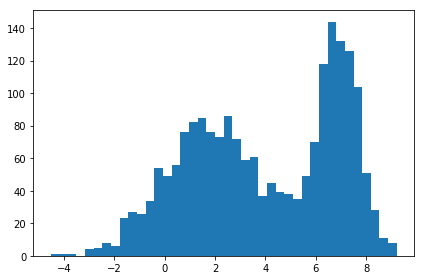

In [11]:
data=np.concatenate((x2,x1),axis=0)
#random.shuffle(x)
n_bins=40
fig, axs = plt.subplots(tight_layout=True)
hist=axs.hist(data, bins=n_bins)
plt.show()

In [12]:
mu_initial=np.array([0,3])
var_initial=np.array([.5,1])
pi_initial=np.array([.5,.5])
epsilon=0.01
Q_func_new=1
Q_func=0
C=2
counter=0;


In [13]:
x=data[:,0]
n=len(x)
try:
    d=len(x[0])
except:
    d=1
print(n,d)

2000 1


In [14]:
while (Q_func_new- Q_func)>epsilon:
    
    a_ij=np.zeros((n,C))
    h_ij=np.zeros((n,C))
    log_normal=np.zeros((n,C))
    for i in range(C):
        a_ij[:,i]=multivariate_normal.pdf(x,mu_initial[i],var_initial[i])
        
    for i in range(C):
        h_ij[:,i]=(a_ij[:,i]*pi_initial[i])/np.matmul(a_ij,pi_initial)
        
    for i in range(C):
        log_normal[:,i]=np.log(multivariate_normal.pdf(x,mu_initial[i],var_initial[i])*pi_initial[i])
        
    
    Q_func=0
    
    for i in range(C):
        Q_func+=np.dot(h_ij[:,i].T,log_normal[:,i])
        
    
    
    
    
    
   
    
    pi_initial=sum(h_ij)/n
    mu_initial=np.dot(h_ij.T,x)/sum(h_ij)
    s1=(x-mu_initial[0])**2
    s2=(x-mu_initial[1])**2
    var_initial=[np.dot(h_ij[:,0],s1)/sum(h_ij[:,0]),np.dot(h_ij[:,1],s2)/sum(h_ij[:,1])]
    var_initial
    
    log_normal=np.zeros((2000,2))
    for i in range(C):
        log_normal[:,i]=np.log(multivariate_normal.pdf(x,mu_initial[i],var_initial[i])*pi_initial[i])
        
    
    Q_func_new=0
    
    for i in range(C):
        Q_func_new+=np.dot(h_ij[:,i].T,log_normal[:,i])
        
    

    

In [15]:
print("weights: " ,pi_initial)
print("means: ",mu_initial)
print("variances:",var_initial)

weights:  [0.58531826 0.41468174]
means:  [1.90250317 6.92221101]
variances: [3.826449134360448, 0.6375783724296157]
